# 2020 MLB Standings Race 

### Most Recently Updated on August 26th, 2020

By: Holden Bridge 

Note: The pullTable function used in this notebook was written by Ben Kite (https://github.com/BenKite/baseball_data). All other code found in this notebook was entirely written by me. 


In [12]:
# Import relevant libraries 
import pandas 
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import matplotlib.animation as animation
from IPython.display import HTML
import requests, bs4
import re, os
from bs4 import BeautifulSoup
from IPython.display import Image

In [2]:
# Helpful function found at https://github.com/BenKite/baseball_data
def pullTable(url, tableID):
    res = requests.get(url)
    comm = re.compile("<!--|-->")
    soup = bs4.BeautifulSoup(comm.sub("", res.text), 'lxml')
    tables = soup.findAll('table', id = tableID)
    data_rows = tables[0].findAll('tr')
    data_header = tables[0].findAll('thead')
    data_header = data_header[0].findAll("tr")
    data_header = data_header[0].findAll("th")
    game_data = [[td.getText() for td in data_rows[i].findAll(['th','td'])]
        for i in range(len(data_rows))
        ]
    data = pandas.DataFrame(game_data)
    header = []
    for i in range(len(data.columns)):
        header.append(data_header[i].getText())
    data.columns = header
    data = data.loc[data[header[0]] != header[0]]
    data = data.reset_index(drop = True)
    return(data)

In [3]:
# Colors for each MLB team as well as the dates to be included in the video
ALcolors = {'NYY': 'navy', 'TBR' : 'lightskyblue', 'BOS' : 'red', 'TOR' : 'dodgerblue', 'BAL': 'darkorange', 'MIN' : 'cornflowerblue', 'CLE' : 'darkred', 'CHW' : 'grey', 'DET' : 'orange', 'KCR' : 'gold', 'OAK' : 'forestgreen', 'HOU' : 'tab:orange', 'TEX' : 'royalblue', 'LAA': 'tab:red','SEA': 'teal'}
NLcolors = {'LAD': 'dodgerblue', 'CHC' : 'royalblue', 'SDP' : 'darkgoldenrod', 'ATL' : 'mediumblue', 'STL': 'tab:red', 'MIA' : 'limegreen', 'COL' : 'blueviolet', 'NYM' : 'tab:orange', 'SFG' : 'orange', 'MIL' : 'navy', 'ARI' : 'goldenrod', 'PHI' : 'red', 'WSN' : 'crimson', 'CIN': 'r','PIT': 'gold'}
szn= ['0723', '0724', '0725', '0726', '0727', '0728', '0729', '0730', '0731', '081', '082','083','084','085', '086', '087', '088', '089', '0810','0811','0812','0813','0814','0815','0816','0817','0818','0819','0820','0821','0822','0823','0824', '0825']

# Function to create an plot for a given date (American League)
def ALplotdate(date):
    month  = int(date[0:2])
    day = int(date[2:])
    tab = pullTable("https://www.baseball-reference.com/boxes/?year=2020&month={}&day={}".format(month,day), "standings-upto-AL-overall")
    tab['W-L%'] = tab['W-L%'].astype(float)
    ig, ax = plt.subplots(figsize=(20, 10))
    tab = tab.sort_values('W-L%', ascending = True)
    ax.set_facecolor('whitesmoke')
    ax.barh(tab['Tm'], tab['W-L%'], color = [ALcolors.get(x) for x in tab['Tm']] )
    ax.set_title("2020 MLB Playoff Race - American League", size = 30)
    ax.set_xlabel("Win-Loss Percentage", size = 20)
    ax.axhline(6.525, linewidth = 2.5, color = 'black', linestyle = '--')
    ax.text(1, 0.4, "Projected Playoff Cutoff", transform=ax.transAxes, size=15, position = (0.82, 0.49))
    ax.set_yticks([])
    ax.tick_params(labelsize = 15)
    dx = tab['W-L%'].max() / 200
    for i, (wl, team) in enumerate(zip(tab['W-L%'], tab['Tm'])):
        ax.text(wl-dx, i,     team,           size=16, weight=800, ha='right', va='center', color = 'white')
        ax.text(wl+dx, i,     wl ,  size=14, weight = 400, ha='left',  va='center')
    
    if(month == 7):
        ax.text(1, 0.4, "July " + str(day), transform=ax.transAxes, size=35, position = (0.7, 0.1))
    elif(month == 8):
        ax.text(1, 0.4, "August " + str(day), transform=ax.transAxes, size=35, position = (0.7, 0.1))
        
    ig.savefig('AL'+ date  + '.png', facecolor = 'white')

# Function to create an plot for a given date (National League)
def NLplotdate(date):
    month  = int(date[0:2])
    day = int(date[2:])
    tab = pullTable("https://www.baseball-reference.com/boxes/?year=2020&month={}&day={}".format(month,day), "standings-upto-NL-overall")
    tab['W-L%'] = tab['W-L%'].astype(float)
    ig, ax = plt.subplots(figsize=(20, 10))
    tab = tab.sort_values('W-L%', ascending = True)
    ax.set_facecolor('whitesmoke')
    ax.barh(tab['Tm'], tab['W-L%'], color = [NLcolors.get(x) for x in tab['Tm']] )
    ax.set_title("2020 MLB Playoff Race - National League", size = 30)
    ax.set_xlabel("Win-Loss Percentage", size = 20)
    ax.axhline(6.525, linewidth = 2.5, color = 'black', linestyle = '--')
    ax.text(1, 0.4, "Projected Playoff Cutoff", transform=ax.transAxes, size=15, position = (0.82, 0.49))
    ax.set_yticks([])
    ax.tick_params(labelsize = 15)
    dx = tab['W-L%'].max() / 200
    for i, (wl, team) in enumerate(zip(tab['W-L%'], tab['Tm'])):
        ax.text(wl-dx, i,     team,           size=16, weight=800, ha='right', va='center', color = 'white')
        ax.text(wl+dx, i,     wl ,  size=14, weight = 400, ha='left',  va='center')
    
    if(month == 7):
        ax.text(1, 0.4, "July " + str(day), transform=ax.transAxes, size=35, position = (0.7, 0.1))
    elif(month == 8):
        ax.text(1, 0.4, "August " + str(day), transform=ax.transAxes, size=35, position = (0.7, 0.1))
        
    ig.savefig('NL'+ date  + '.png', facecolor = 'white')

Uncomment the following 3 lines to produce the individual plots for each date for both the American and National League. These images were used to make the videos seen below. 

In [4]:
# for i in szn:
#     ALplotdate(i)
#     NLplotdate(i)

For the shortened 2020 season the MLB expanded their playoff format to include the top 2 teams from each division and 2 wild card teams with the highest win percentage from the remaining pool of teams. The "Projected Playoff Cutoff" you see below marks the top 8 teams in terms of win percentage. There is a small chance that a team outside of the top 8 could be in the playoffs depending their division. However, for simplicity sake I used the top 8 teams in terms of win percentage to predict who will reach the playoffs. 

The following videos show the playoff race for the American and National League respectively. 

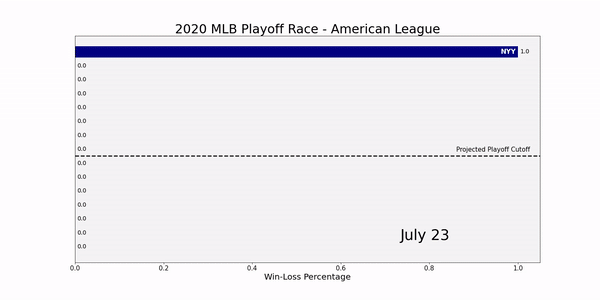

In [14]:
Image(filename="AL825.gif", width = 900, height = 500)

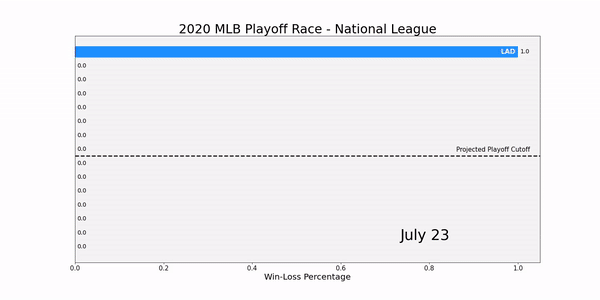

In [15]:
Image(filename="NL825.gif", width = 900, height = 500)